[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Morrison_and_Grabowski_2007/fig_1.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Morrison_and_Grabowski_2007/fig_1.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Morrison_and_Grabowski_2007/fig_1.ipynb)

#### based on Fig. 1 from Morrison & Grabowski 2007 (J. Atmos. Sci. 64)  "_Comparison of Bulk and Bin Warm-Rain Microphysics Models Using a Kinematic Framework_"
https://doi.org/10.1175/JAS3980

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
import numpy as np
from PySDM_examples.Morrison_and_Grabowski_2007.strato_cumulus import StratoCumulus
from PySDM_examples.utils.kinematic_2d.fields import nondivergent_vector_field_2d, z_vec_coord, x_vec_coord
from PySDM.physics import si
from PySDM import Formulae
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

In [16]:
settings = StratoCumulus(Formulae(), rhod_w_max=1 * si.m/si.s * si.kg/si.m**3)
settings.grid = (64, 64)
settings.size = (2*si.km, 1*si.km)
settings.dt = 1 * si.s

rho_times_courant = nondivergent_vector_field_2d(
    grid=settings.grid,
    size=settings.size,
    dt=settings.dt,
    stream_function=settings.stream_function,
    t=np.nan
)
dz = settings.size[-1] / settings.grid[-1]
dx = settings.size[0] / settings.grid[0]

levels = np.linspace(-1.5, 1.5, 7) * si.m/si.s

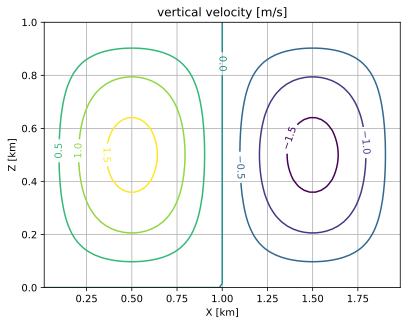

In [17]:
z_vec_coords = tuple(coord * settings.size[i]/si.km for i, coord in enumerate(z_vec_coord(settings.grid)))
pyplot.clabel(pyplot.contour(
    *z_vec_coords,
    rho_times_courant[-1] * dz / settings.dt / settings.rhod_of_zZ(z_vec_coords[-1]/settings.size[-1]),
    levels=levels
))
pyplot.grid()
pyplot.title('vertical velocity [m/s]')
pyplot.xlabel('X [km]')
pyplot.ylabel('Z [km]')
show_plot()

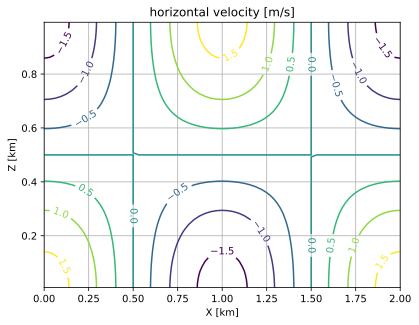

In [18]:
x_vec_coords = tuple(coord * settings.size[i]/si.km for i, coord in enumerate(x_vec_coord(settings.grid)))
pyplot.clabel(pyplot.contour(
    *x_vec_coords,
    rho_times_courant[0] * dx / settings.dt / settings.rhod_of_zZ(x_vec_coords[0]/settings.size[0]),
    levels=levels
))
pyplot.title('horizontal velocity [m/s]')
pyplot.grid()
pyplot.xlabel('X [km]')
pyplot.ylabel('Z [km]')
show_plot()